In [1]:
# Importing relevant Python libraries
import pandas
import re
import os.path
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading the data into a Pandas DataFrame
tweet_df = pandas.read_json("../data/kentucky school shooting.json")
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,None,2018-01-23 16:53:33,"[0, 140]","{'symbols': [], 'urls': [], 'hashtags': [], 'u...",NaN,0,False,RT @LucasBryner3: Another fricken shooting in ...,None,...,NaN,NaN,NaN,NaN,2,False,"{'display_text_range': [0, 191], 'id_str': '95...","<a href=""http://twitter.com/download/android"" ...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
1,NaN,None,2018-01-23 16:53:33,"[0, 140]","{'symbols': [], 'urls': [], 'hashtags': [], 'u...",NaN,0,False,"RT @ALT_uscis: There was a Kentucky ""Marshall ...",None,...,NaN,NaN,NaN,NaN,34,False,"{'display_text_range': [0, 172], 'id_str': '95...","<a href=""http://twitter.com/#!/download/ipad"" ...",False,{'profile_image_url': 'http://abs.twimg.com/st...
2,NaN,None,2018-01-23 16:53:32,"[0, 112]","{'symbols': [], 'urls': [{'indices': [89, 112]...",NaN,0,False,Authorities: At least 5 people shot this morni...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.socialnewsdesk.com"" rel=""n...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
3,NaN,None,2018-01-23 16:53:32,"[0, 112]","{'symbols': [], 'urls': [{'indices': [89, 112]...",NaN,0,False,Authorities: At least 5 people shot this morni...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.socialnewsdesk.com"" rel=""n...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
4,NaN,None,2018-01-23 16:53:30,"[0, 154]","{'symbols': [], 'urls': [{'indices': [131, 154...",NaN,0,False,There was a shooting at a high school in Kentu...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...


In [3]:
# Finding the number of Tweets in the Dataframe
print("Number of Tweets: %d" % len(tweet_df))

Number of Tweets: 19930


In [4]:
# Exporting the JSON to a CSV for easier external analysis
if not os.path.isfile("../data/converted_json.csv"): # Only export if not previously exported...
    tweet_df.to_csv("../data/converted_json.csv", index=False)

In [5]:
# Extracting the URLs from the DataFrame
extracted_urls = []
for idx, tweet in tweet_df.iterrows():
    tweet_id = tweet["id"]
    created_at = tweet.created_at
    user_screen_name = tweet.user["screen_name"]
    tweet_url = "https://twitter.com/%s/status/%d" % (user_screen_name, tweet_id)
    for url in tweet.entities["urls"]:
        extracted_urls.append([tweet_id, tweet_url, created_at, url["expanded_url"]])
extracted_urls[0]

[955845970306260992,
 'https://twitter.com/kpaxnews/status/955845970306260992',
 Timestamp('2018-01-23 16:53:32'),
 'http://www.kpax.com/story/37329938/kentucky-school-shooting-at-least-5-shot-at-marshall-county-hs']

In [6]:
# Creating a new DataFrame from the extracted URL info
url_df = pandas.DataFrame(extracted_urls, columns = ["tweet_id", "tweet_url", "created_at", "url"])
url_df.head()

,tweet_id,tweet_url,created_at,url
0,955845970306260992,https://twitter.com/kpaxnews/status/9558459703...,2018-01-23 16:53:32,http://www.kpax.com/story/37329938/kentucky-sc...
1,955845969190547456,https://twitter.com/KAJNews/status/95584596919...,2018-01-23 16:53:32,http://www.kpax.com/story/37329938/kentucky-sc...
2,955845959405260800,https://twitter.com/kwanzer/status/95584595940...,2018-01-23 16:53:30,https://www.nbcnews.com/news/us-news/one-dead-...
3,955845931412393990,https://twitter.com/_moribund_/status/95584593...,2018-01-23 16:53:23,http://cnn.it/2BpIXhK
4,955845916564606977,https://twitter.com/rollin_oliver/status/95584...,2018-01-23 16:53:19,http://abcn.ws/2BoEmMG


In [7]:
# Exporting the extracted URL's to a new CSV
if not os.path.isfile("../data/extracted_urls.csv"): # Only export if not previously exported...
    url_df.to_csv("../data/extracted_urls.csv", index = False)

In [8]:
# Finding number of extracted URL's
print("Number of URL's extracted: %d" % len(url_df))
print("Number of unique URL's: %d" % len(url_df.url.unique()))

Number of URL's extracted: 10575
Number of unique URL's: 2702


In [9]:
# Finding information on the domain for each URL

# Extracting the domain from the URL
domain_re = re.compile("http[s]*://([^/]+)")
url_df["url_domain"] = url_df.url.apply(lambda X: domain_re.search(X).group(1))

# Removing leading www.
www_re = re.compile("^www\.")
url_df["url_domain"] = url_df["url_domain"].apply(lambda X: www_re.sub("", X))

url_df.head()

,tweet_id,tweet_url,created_at,url,url_domain
0,955845970306260992,https://twitter.com/kpaxnews/status/9558459703...,2018-01-23 16:53:32,http://www.kpax.com/story/37329938/kentucky-sc...,kpax.com
1,955845969190547456,https://twitter.com/KAJNews/status/95584596919...,2018-01-23 16:53:32,http://www.kpax.com/story/37329938/kentucky-sc...,kpax.com
2,955845959405260800,https://twitter.com/kwanzer/status/95584595940...,2018-01-23 16:53:30,https://www.nbcnews.com/news/us-news/one-dead-...,nbcnews.com
3,955845931412393990,https://twitter.com/_moribund_/status/95584593...,2018-01-23 16:53:23,http://cnn.it/2BpIXhK,cnn.it
4,955845916564606977,https://twitter.com/rollin_oliver/status/95584...,2018-01-23 16:53:19,http://abcn.ws/2BoEmMG,abcn.ws


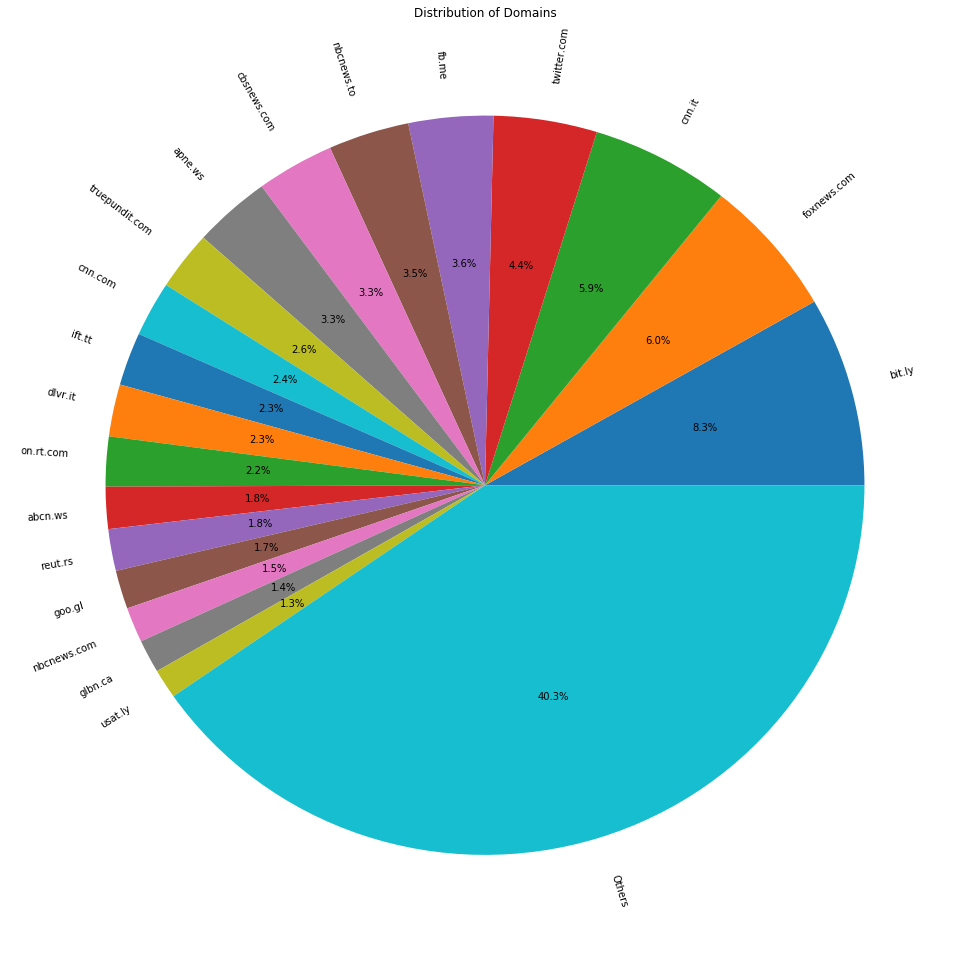

In [10]:
# Creating a visualization of domain distribution
series = url_df.url_domain.value_counts()
series2 = series.head(19)
if len(series) > 19:
    series2['Others'.format(len(series) - 10)] = sum(series[19:])
series2.plot.pie(figsize=(17, 17), autopct='%1.1f%%', label = "", title = "Distribution of Domains", rotatelabels = True)